#Exercício de regressão utilizando dados do Kaggle

### fonte: https://www.kaggle.com/greenwing1985/housepricing 

O objetivo nesse exercício é criar um modelo de machine learning, utilizando a técnica de Regressão Linear, que faça previsões sobre os preços de imóveis a partir de um conjunto de características conhecidas dos imóveis.

Foi utilizado um dataset disponível no Kaggle que foi gerado por computador para treinamento de machine learning para iniciantes.

### Dados:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>precos</b> - Preços do imóveis</li>
    <li><b>area</b> - Área do imóvel</li>
    <li><b>garagem</b> - Número de vagas de garagem</li>
    <li><b>banheiros</b> - Número de banheiros</li>
    <li><b>lareira</b> - Número de lareiras</li>
    <li><b>marmore</b> - Se o imóvel possui acabamento em mármore branco (1) ou não (0)</li>
    <li><b>andares</b> - Se o imóvel possui mais de um andar (1) ou não (0)</li>
</ul>

In [101]:
# Importando bibliotecas
import pandas as pd
import numpy as np

In [4]:
# Leitura dos dados, com separador ;
dados = pd.read_csv("HousePrices_HalfMil.csv", sep =";")

In [5]:
# Visualizar os dados
dados.head()

,precos,area,garagem,banheiros,lareira,marmore,andares
0,51875,25,3,4,3,0,1
1,17875,35,1,3,1,0,0
2,47075,195,2,4,2,0,0
3,38575,33,2,2,1,0,1
4,33775,11,2,3,0,0,1


In [6]:
# Tamanho do dataset
dados.shape

(1000, 7)

In [7]:
# Estatística Descritiva
dados.describe().round(2)

,precos,area,garagem,banheiros,lareira,marmore,andares
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,41985.60,124.33,2.01,3.00,2.03,0.33,0.48
std,12140.39,72.39,0.81,1.43,1.42,0.47,0.50
min,13150.00,1.00,1.00,1.00,0.00,0.00,0.00
25%,33112.50,60.75,1.00,2.00,1.00,0.00,0.00
50%,41725.00,123.00,2.00,3.00,2.00,0.00,0.00
75%,51175.00,187.00,3.00,4.00,3.00,1.00,1.00
max,73675.00,249.00,3.00,5.00,4.00,1.00,1.00


In [69]:
# Matriz de correlação
dados.corr().round(4)

,precos,area,garagem,banheiros,lareira,marmore,andares
precos,1.0000,0.1177,0.1028,0.1244,0.1072,0.4308,0.6315
area,0.1177,1.0000,-0.0075,-0.0114,0.0121,-0.0153,-0.0180
garagem,0.1028,-0.0075,1.0000,0.0671,0.0605,-0.0156,-0.0206
banheiros,0.1244,-0.0114,0.0671,1.0000,0.0484,-0.0253,-0.0182
lareira,0.1072,0.0121,0.0605,0.0484,1.0000,0.0296,-0.0035
marmore,0.4308,-0.0153,-0.0156,-0.0253,0.0296,1.0000,-0.0065
andares,0.6315,-0.0180,-0.0206,-0.0182,-0.0035,-0.0065,1.0000


Possuir mármore e mais de um andar está mais fortemente correlacionado com os preços, de forma positiva.

As variáveis explicativas possuem pouca correlação entre si.


# Análises Gráficas

In [88]:
# Importando bibliotecas
import seaborn as sns
sns.set_palette('Accent')
sns.set_style("darkgrid")

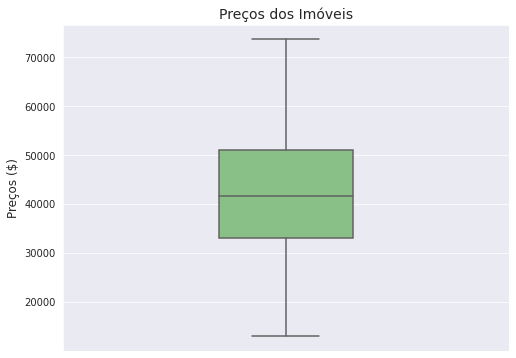

In [75]:
ax = sns.boxplot(data=dados["precos"], orient ="v", width=0.3)
ax.figure.set_size_inches(8,6)
ax.set_title("Preços dos Imóveis", fontsize = 14)
ax.set_ylabel("Preços ($)", fontsize = 12)
ax.set_xticklabels("")
ax

Preço aparentemente bem distribuídos, sem valores discrepantes.

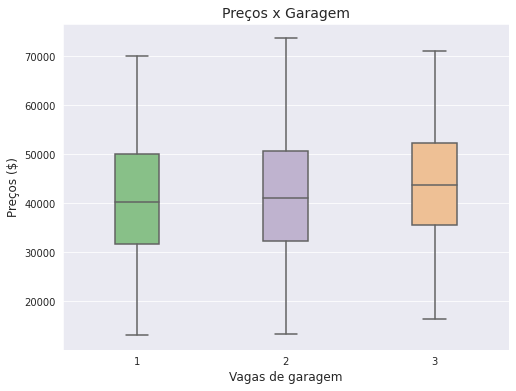

In [76]:
# Box-plot Preços x Garagem
ax = sns.boxplot(data=dados, x="garagem", y='precos', orient ="v", width=0.3)
ax.figure.set_size_inches(8,6)
ax.set_title("Preços x Garagem", fontsize = 14)
ax.set_ylabel("Preços ($)", fontsize = 12)
ax.set_xlabel("Vagas de garagem", fontsize = 12)
ax

Os preços apresentam praticamente o mesmo padrão para todos os casos.

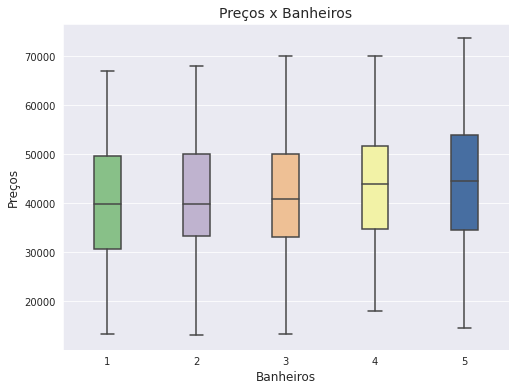

In [78]:
# Box-plot Preços x Banheiros
ax = sns.boxplot(data=dados, x="banheiros", y='precos', orient ="v", width=0.3)
ax.figure.set_size_inches(8,6)
ax.set_title("Preços x Banheiros", fontsize = 14)
ax.set_ylabel("Preços", fontsize = 12)
ax.set_xlabel("Banheiros", fontsize = 12)
ax

Os preços apresentam praticamente o mesmo padrão para todos os casos, com uma leve subida com o aumento do número de banheiros.

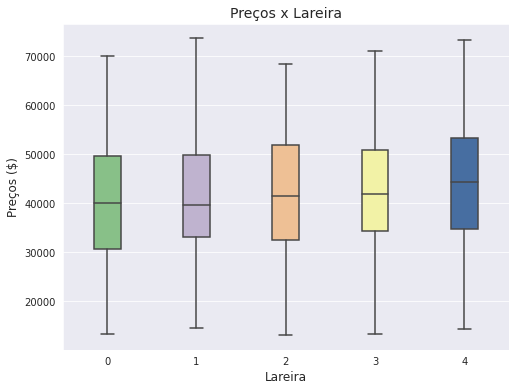

In [80]:
# Box-plot Preços x Lareira
ax = sns.boxplot(data=dados, x="lareira", y='precos', orient ="v", width=0.3)
ax.figure.set_size_inches(8,6)
ax.set_title("Preços x Lareira", fontsize = 14)
ax.set_ylabel("Preços ($)", fontsize = 12)
ax.set_xlabel("Lareira", fontsize = 12)
ax

Novamente um padrão de preço muito semelhante para todos os casos.

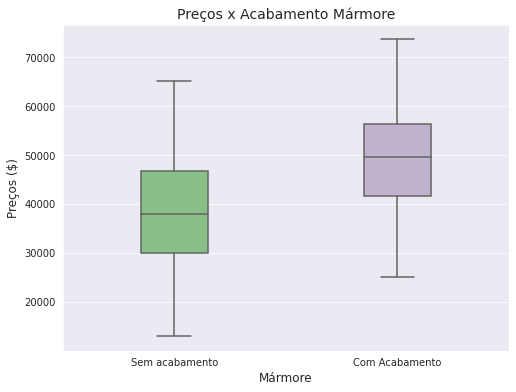

In [79]:
# Box-plot Preços x Acabamento em Mármore
ax = sns.boxplot(data=dados, x="marmore", y='precos', orient ="v", width=0.3)
ax.figure.set_size_inches(8,6)
ax.set_title("Preços x Acabamento Mármore", fontsize = 14)
ax.set_ylabel("Preços ($)", fontsize = 12)
ax.set_xlabel("Mármore", fontsize = 12)
ax.set_xticklabels(["Sem acabamento", "Com Acabamento"])
ax

Percebe-se uma distribuição de preços mais elevados para aqueles imóveis com acabamento em mármore.

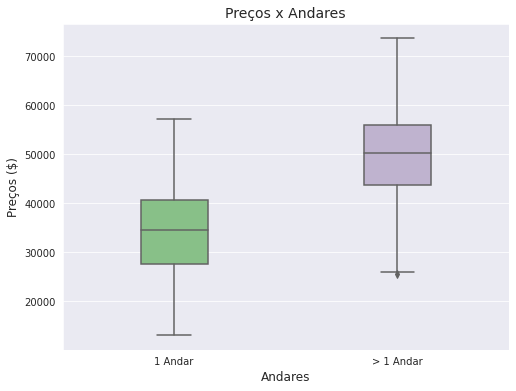

In [81]:
# Box-plot Preços x Andares
ax = sns.boxplot(data=dados, x="andares", y='precos', orient ="v", width=0.3)
ax.figure.set_size_inches(8,6)
ax.set_title("Preços x Andares", fontsize = 14)
ax.set_ylabel("Preços ($)", fontsize = 12)
ax.set_xlabel("Andares", fontsize = 12)
ax.set_xticklabels(["1 Andar", "> 1 Andar"])
ax

Percebe-se uma distribuição de preços mais elevados para aqueles imóveis com mais de um andar.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


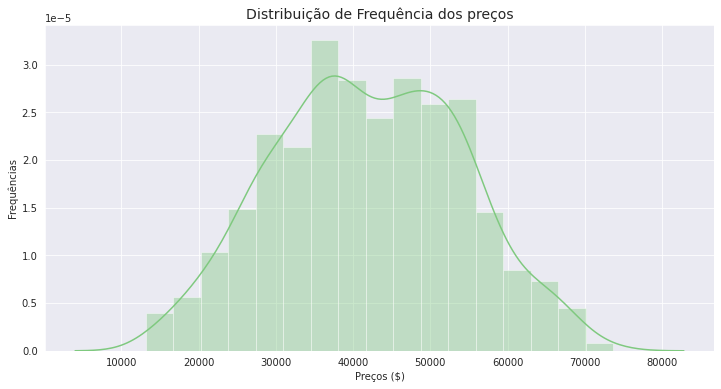

In [84]:
# Distribuição de frequências dos preços dos imóveis
ax = sns.distplot(dados["precos"])
ax.figure.set_size_inches(12,6)
ax.set_title("Distribuição de Frequência dos preços", fontsize = 14)
ax.set_xlabel("Preços ($)")
ax.set_ylabel("Frequências")
ax

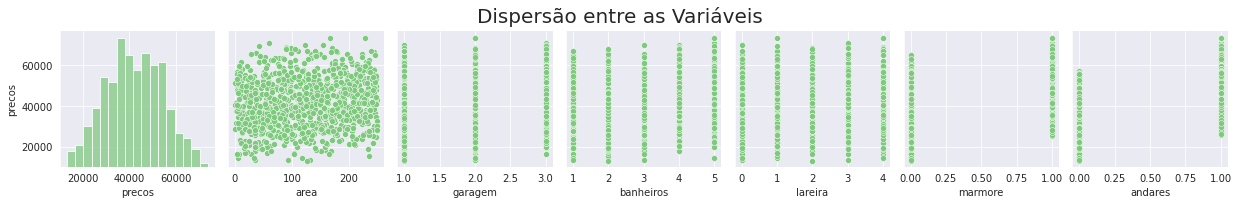

In [90]:
ax = sns.pairplot(dados, y_vars='precos', x_vars=['precos',	'area', 'garagem',	'banheiros',	'lareira',	'marmore', 'andares'])
ax.fig.suptitle("Dispersão entre as Variáveis", fontsize=20, y=1.1)
ax

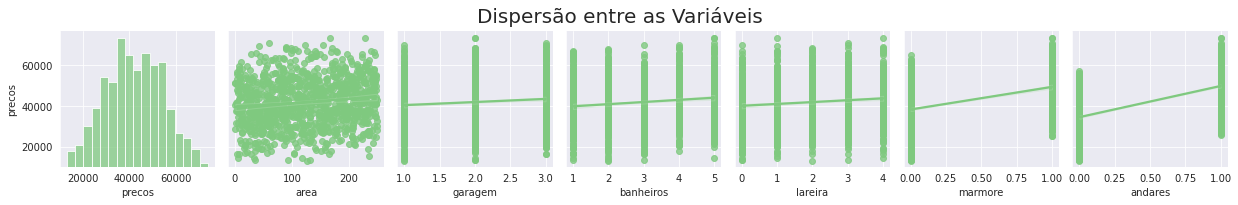

In [92]:
ax = sns.pairplot(dados, y_vars='precos', x_vars=['precos',	'area', 'garagem',	'banheiros',	'lareira',	'marmore', 'andares'], kind='reg')
ax.fig.suptitle("Dispersão entre as Variáveis", fontsize=20, y=1.1)
ax


Mármore e andares com uma inclinação maior; Nenhuma relação negativa

# Criando o modelo

In [93]:
# Importando biblioteca
from sklearn.model_selection import train_test_split

In [25]:
y = dados["precos"]

In [32]:
# Variáveis explicativas
X = dados[["area", "garagem", "banheiros", "lareira", "marmore", "andares"]]

In [94]:
# Criando os datasets de treino e de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=555)

In [36]:
# Importando bibliotecas
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [38]:
# Instanciando a classe LinearRegression()
modelo = LinearRegression()

In [40]:
# Estimando o modelo com fit()
modelo.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
# Coeficiente de determinação (R²) do modelo estimado com os dados de treino
print("R² = {}".format(modelo.score(X_train, y_train).round(2)))

R² = 0.65


In [48]:
# Gerando previsões para os dados de teste
y_previsto = modelo.predict(X_test)

In [46]:
# Coeficiente de determinação (R²) para previsões do modelo
print("R² = %s" %(metrics.r2_score(y_test, y_previsto).round(2)))

R² = 0.64


# Criando um simulador simples

Simulador que gera estimativas de preço a partir de um conjunto de informações de um imóvel.

In [100]:
area=35
garagem=2
banheiros=3
lareira=1
marmore=1
andares=1

entrada = [[area, garagem, banheiros, lareira, marmore, andares]]

print("O preço do imóvel tende a ser R$ {0:.2f}".format(modelo.predict(entrada)[0]))

O preço do imóvel tende a ser R$ 54623.05


# Métricas da regressão

In [105]:
EQM = metrics.mean_squared_error(y_test, y_previsto).round(2)
REQM = np.sqrt(metrics.mean_squared_error(y_test, y_previsto)).round(2)
R2 = metrics.r2_score(y_test, y_previsto).round(2)

pd.DataFrame([EQM, REQM, R2], ["EQM", "REQM", "R²"], columns=["Métricas"])

,Métricas
EQM,52154971.09
REQM,7221.84
R²,0.64


# Salvando o modelo estimado

In [106]:
import pickle

In [107]:
output = open('modelo_preco', 'wb')
pickle.dump(modelo, output)
output.close()